# Project Name: Insurance Premium Prediction

The main aim of this project is to predict the insurance prices based on various features. This is a regression type problem. Here we will apply linear regression, ridge, lasso, elastic and other regressions.

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


kaggle dataset [link](https://www.kaggle.com/noordeen/insurance-premium-prediction)

# All the Lifecycle In A Data Science Projects
1. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis(EDA))
2. [Feature Engineering](#Feature-Engineering)
3. Feature Selection
4. Model Building
5. Model Deployment

### importing necesscary libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### loading dataset

In [4]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

dataset containg 1338 no of rows and 7 columns.
Where features are [age,sex,bmi,children, smoke, region] and target variable is expenses.

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

## Exploratory Data Analysis(EDA)

In Exploratory Data Analysis We will Analyze To Find out the below stuff

- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

we have no missing values. So no need to bothering about filling missing value techniques.

### Numerical and Categorical features/ Variables 

In [6]:
numerical_cols = [col for col in df.columns if df[col].dtype!='O']
categorical_cols = [col for col in df.columns if df[col].dtype=='O']

In [7]:
print(f"Numberical columns are = {numerical_cols}")
print(f"Categorical columns are = {categorical_cols}")

Numberical columns are = ['age', 'bmi', 'children', 'expenses']
Categorical columns are = ['sex', 'smoker', 'region']


In [9]:
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 25]
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 25]

In [10]:
print(f"Continuous values features are = {continuous_cols}")
print(f"Discrete values feature is = {discrete_cols}")

Continuous values features are = ['age', 'bmi', 'expenses']
Discrete values feature is = ['children']


### Distribution of the Numerical Variables

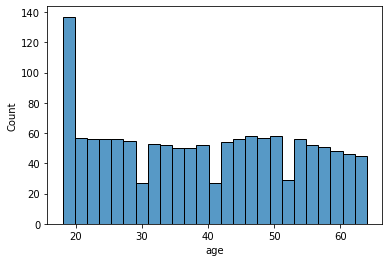

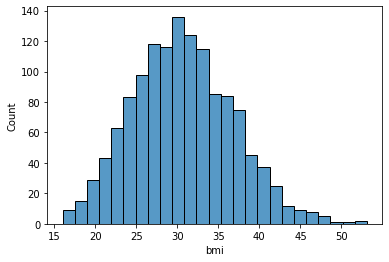

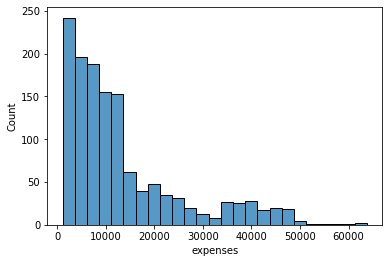

In [11]:
for col in continuous_cols:
    sns.histplot(df[col], bins=25)
    plt.show()

age column is like almost constant.But there is spike for 18-20 range. May be because 18 years is minimum year old enough need to buy this insurance. Age column also tells us there is all types of ages person buys insurance. Though age is real-world quantity so it should follow normal distributionbut here is exception.

bmi column is following normal distribution.
expenses column is right-skewed. Need to convert these (mainly expenses) to nomral distribution for better performance of model.

In [12]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
df.groupby('children')['expenses'].median()

children
0     9856.950
1     8483.870
2     9264.980
3    10600.550
4    11033.660
5     8589.565
Name: expenses, dtype: float64

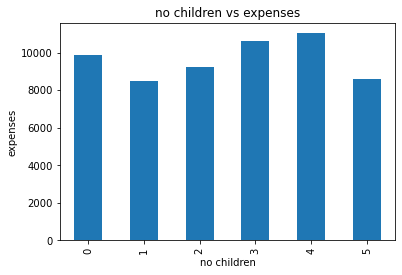

In [27]:
df.groupby('children')['expenses'].median().plot(kind='bar')
plt.title("no children vs expenses")
plt.xlabel("no children")
plt.ylabel("expenses")
plt.show()

It looks like if patients have 0-5 no of childrens then almost no changes among their medical bills.

### Categorical Variables

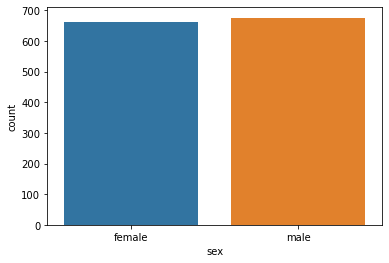

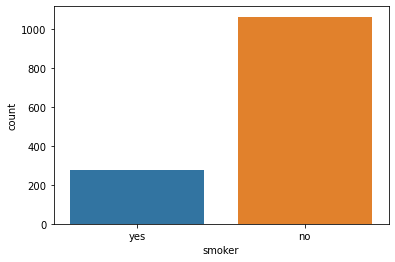

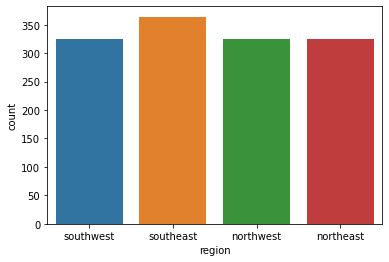

In [28]:
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.show()

Majority patients are non-smoker.

Drawing plots for categorical: smoker


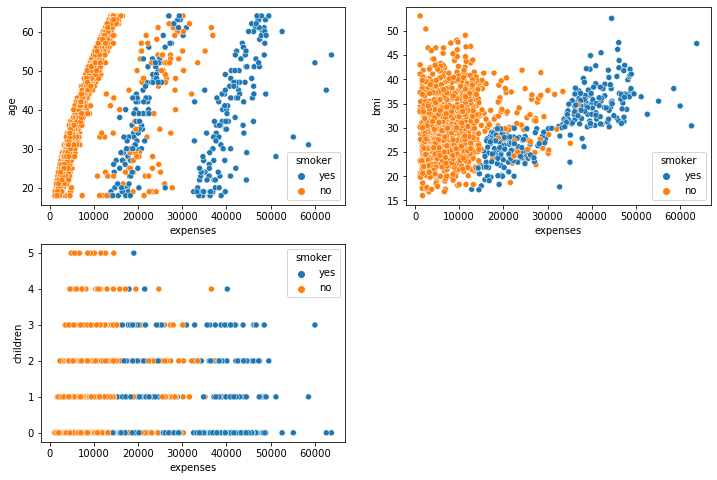

Drawing plots for categorical: sex


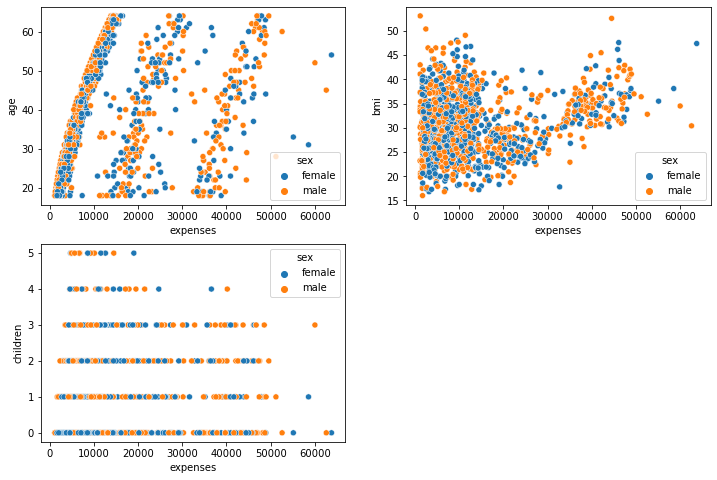

In [40]:
for col_outer in ['smoker', 'sex']:
    print("=" * 50)
    
    plt.figure(figsize=(12, 8))
    print(f"Drawing plots for categorical: {col_outer}")
    counter = 1
    for col_inner in numerical_cols:
        if col_inner != 'expenses':
            plt.subplot(2, 2, counter)
            sns.scatterplot(x=df['expenses'], y=df[col_inner], hue=df[col_outer])
            counter += 1
    
    plt.show()
    print("=" * 50)
            

From these plots we can a lot of things. Lets llok first for sex. If patient is male or female expenses or medical bills depending on their ages, bmi, children they have almost identical. Meaning depending upon sex we can not say that expense of these patients is higher or something like that. 

But From smoker category can cay that if a person smoke then his/her expenses will be higher than non-smoker. Age, bmi everey where we can see the massive difference.

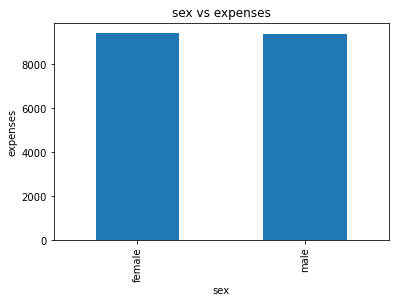

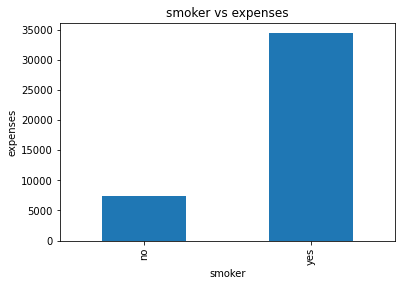

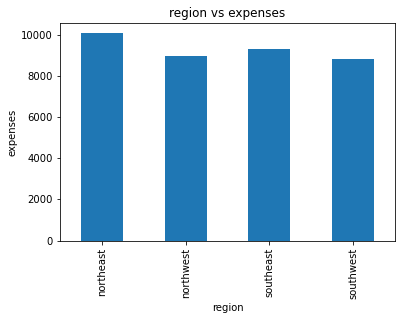

In [39]:
for col in categorical_cols:
    df.groupby(col)['expenses'].median().plot(kind='bar')
    
    plt.title(f"{col} vs expenses")
    plt.xlabel(col)
    plt.ylabel("expenses")
    
    plt.show()

Just like i said previously that depending upon their sex expenses if no diff. There is almost no difference if someone is from northeast of northwest or southeast or southwest. But slighly northeast peoples expenses is higher. And for smoker category their no need explain, its clearly visable.

In [52]:
df_smoker

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88
...,...,...,...,...,...,...,...
1313,19,female,34.7,2,yes,southwest,36397.58
1314,30,female,23.7,3,yes,northwest,18765.88
1321,62,male,26.7,0,yes,northeast,28101.33
1323,42,female,40.4,2,yes,southeast,43896.38


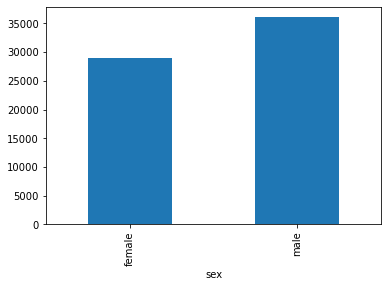

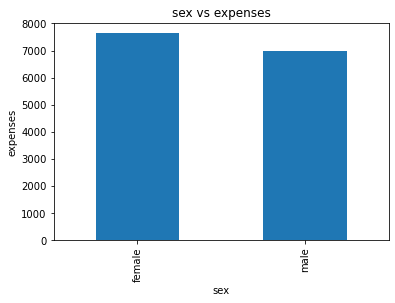

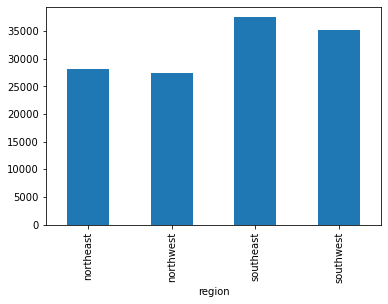

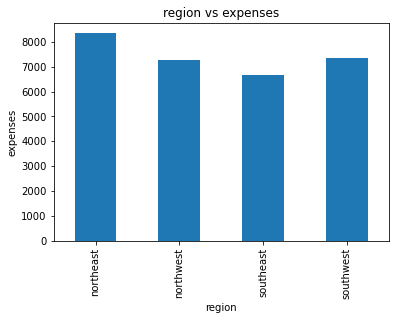

In [56]:
df_smoker = df[df['smoker']=='yes']
df_non_smoker = df[df['smoker']=='no']

for col in categorical_cols:
    if col == 'smoker':
        continue
    
    df_smoker.groupby(col)['expenses'].median().plot(kind='bar')
    plt.show()
    df_non_smoker.groupby(col)['expenses'].median().plot(kind='bar')
    
    plt.title(f"{col} vs expenses")
    plt.xlabel(col)
    plt.ylabel("expenses")
    
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='Count'>

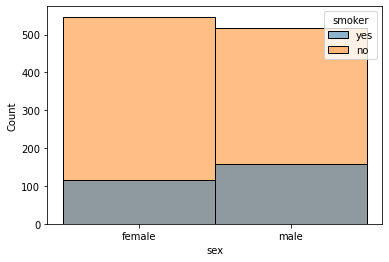

In [61]:
sns.histplot(x=df['sex'],hue=df['smoker'])

<AxesSubplot:xlabel='region', ylabel='Count'>

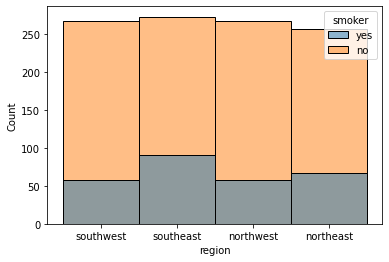

In [60]:
sns.histplot(x=df['region'],hue=df['smoker'])

### outliers

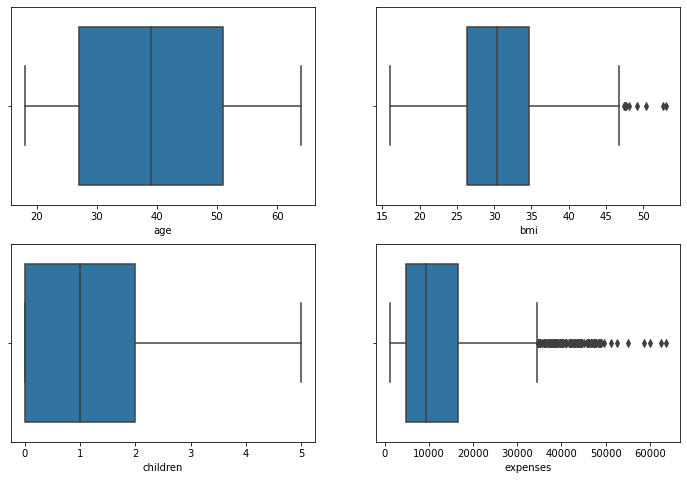

In [62]:
plt.figure(figsize=(12, 8))

count = 1
for col in numerical_cols:
    plt.subplot(2, 2, count)
    sns.boxplot(x=df[col])
    count += 1
    
plt.show()

bmi column contain little amount of outliers. But expenses(Target Variable) containing a lot of outliers. Using Transformation need to remove those.

### checking for multi-colinearity

In [64]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

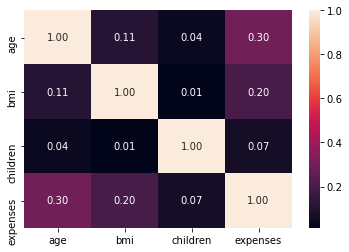

In [71]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

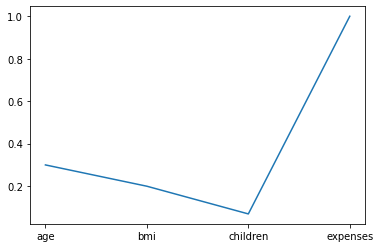

In [69]:
plt.plot(df.corr()['expenses'])

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

calc_vif(df[numerical_cols[:-1]])

,variables,VIF
0,age,7.537196
1,bmi,7.846898
2,children,1.796587


bmi and age have higher VIF score. though VIF > 5 but still less than 10 so not droping age column. And for other columns VIF score is around 1 which is good.

so we completed EDA part of this project. Next Feature Engineering.

## Feature Engineering